# Scrape data of Database of Modern Exhibitions (DoME)



## Imports

In [182]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
import urllib.request
from bs4 import BeautifulSoup
import re

## Load Artists

In [182]:
person = pd.read_excel("Person.xlsx")

## Scrape data
This code takes the id from the artists table and uses a url to download informations about all exhibitions this particular artist had been attending. 
It also scrapes data of the total number of cities and countries that particular artist attended.

In [155]:
artist = {}
for index, row in person.iterrows():
    print("{0} - Now at Artist: {1}".format(index, row["Name"]))
    artistInfo = {}
    id = row["ID"]
    artistInfo["id"] = id
    export = pd.read_excel("https://exhibitions.univie.ac.at/person/" + str(id) + "/exhibition/csv")
    cities = Counter(export["City"].tolist())
    # print(cities)
    artistInfo["cities"] = cities
    artistInfo["gender"] = row["Gender"]
    artistInfo["nExhibitions"] = row["# Exhibitions"]
    artist[row["Name"]] = artistInfo
    # Gets cities and countries
    url = "https://exhibitions.univie.ac.at/person/" + str(id)
    print("Reading URL")
    opener = urllib.request.urlopen(url)
    print("URL finished loading")
    content = opener.read()
    soup = BeautifulSoup(content,'lxml')
    supa = soup.findAll("div", { "class" : "artist-information-text-stats" })
    exPerCountry = supa[-2] # exhibitions per country
    exPerCity = supa[-1] # exhibitions per city
    exPerCountryText = exPerCountry.get_text()
    exPerCityText = exPerCity.get_text()
    nExPerCountry = re.sub('\D', '', exPerCountryText)
    nExPerCity = re.sub('\D', '', exPerCityText)
    artistInfo["exhibitions per country"] = nExPerCountry
    artistInfo["exhibitions per city"] = nExPerCity
    if index > 99:
        break
    

0 - Now at Artist: Renoir, Pierre-Auguste
Reading URL
URL finished loading
1 - Now at Artist: Cézanne, Paul
Reading URL
URL finished loading
2 - Now at Artist: Gogh, Vincent van
Reading URL
URL finished loading
3 - Now at Artist: Bonnard, Pierre
Reading URL
URL finished loading
4 - Now at Artist: Vuillard, Edouard
Reading URL
URL finished loading
5 - Now at Artist: Monet, Claude
Reading URL
URL finished loading
6 - Now at Artist: Pissarro, Camille
Reading URL
URL finished loading
7 - Now at Artist: Liebermann, Max
Reading URL
URL finished loading
8 - Now at Artist: Matisse, Henri
Reading URL
URL finished loading
9 - Now at Artist: Manet, Edouard
Reading URL
URL finished loading
10 - Now at Artist: Denis, Maurice
Reading URL
URL finished loading
11 - Now at Artist: Hübner, Ulrich
Reading URL
URL finished loading
12 - Now at Artist: Gauguin, Paul
Reading URL
URL finished loading
13 - Now at Artist: Kandinsky, Vassily
Reading URL
URL finished loading
14 - Now at Artist: Corinth, Lovis
Rea

## Cleanup of the table

In [183]:
del person["Status"]

In [184]:
person = person.drop(person.index[101:])

## Reformat city and country data

In [185]:
allExPerCity = []
allExPerCountry = []
for item in artist:
    allExPerCountry.append(int(artist[item]["exhibitions per country"]))
    allExPerCity.append(int(artist[item]["exhibitions per city"]))
person["Exhibitions per country"] = allExPerCountry
person["Exhibitions per city"] = allExPerCity

## Get a unique list of all cities visited by the artists and fill number of visits for each city

In [187]:
allCities = []
for entry in artist:
    allCities += (list(artist[entry]["cities"].keys()))
    
uniqueCities = np.unique(allCities)
for city in uniqueCities:
    cityList = []
    for index, row in person.iterrows():
        cityList.append(artist[row["Name"]]["cities"][city])
    person[city] = cityList



## Save data to XLSX

In [188]:
person.to_excel("mareisDaten.xlsx")

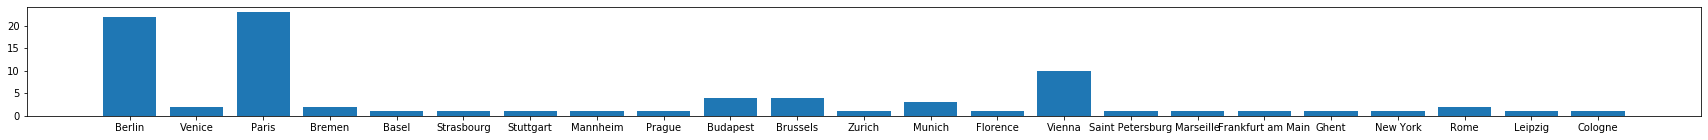

In [3]:
fig, axes = plt.subplots(figsize=(30,2))
barHeight = artist["Renoir, Pierre-Auguste"]["cities"].values()
barString = artist["Renoir, Pierre-Auguste"]["cities"].keys()
axes.bar(barString, barHeight)
plt.savefig("beispiel.png", format="png")